In [1]:
import re
import os

# for analysis
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# extra
import warnings
warnings.filterwarnings(action="ignore")

#Provide path to raw data files
dir_path = r"C:\Users\dell\Downloads\Lead Scoring Assignment"

In [2]:
#reading the data file
file_name = "Leads.csv"
path = os.path.join(dir_path, file_name)
df = pd.read_csv(path)
#checking the top rows of data
df.head()

#for checking data type 
df.info() 
#for checking description
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data cleaning & Data Preparation
#### checking unique value count and handling missing value

In [3]:
# Finding the columns having "Select" values
for cols in df.columns:
    if 'Select' in list(df[cols]):
        print(cols)


Specialization
How did you hear about X Education
Lead Profile
City


In [4]:
#We have above 4 columns, which contain "Select" value.
# Replacing "Select" value as Null in the above column
df['Specialization'].replace({'Select':None}, inplace=True)
df['How did you hear about X Education'].replace({'Select':None}, inplace=True)
df['Lead Profile'].replace({'Select':None}, inplace=True)
df['City'].replace({'Select':None}, inplace=True)

In [5]:
# checking how many unique values are there in columns
unique_values = {}
for i in df.columns:
    unique_values[i] = df[i].nunique()

# Convert dictionary to DataFrame
unique_df = pd.DataFrame.from_dict(unique_values, orient='index', columns=['Unique_Values'])

print(unique_df)

                                               Unique_Values
Prospect ID                                             9240
Lead Number                                             9240
Lead Origin                                                5
Lead Source                                               21
Do Not Email                                               2
Do Not Call                                                2
Converted                                                  2
TotalVisits                                               41
Total Time Spent on Website                             1731
Page Views Per Visit                                     114
Last Activity                                             17
Country                                                   38
Specialization                                            18
How did you hear about X Education                         9
What is your current occupation                            6
What matters most to you

In [6]:
# Checking percent of missing values in columns

(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('nulls').sort_values('nulls', ascending=False)

,nulls
How did you hear about X Education,78.46
Lead Profile,74.19
Lead Quality,51.59
Asymmetrique Profile Score,45.65
Asymmetrique Activity Score,45.65
Asymmetrique Activity Index,45.65
Asymmetrique Profile Index,45.65
City,39.71
Specialization,36.58
Tags,36.29


In [7]:
# We can see that there are high number of missing values in few columns such as How did you hear about X Education, Lead profile, Lead Quality etc.

#checking the missing value in columns percentage wise
# Dropping the columns where more than 25% of the data are missing
threshold = 25
missing_percentages = 100*df.isnull().mean()
print(missing_percentages)
columns_to_drop = missing_percentages[missing_percentages > threshold].index
df = df.drop(columns_to_drop, axis=1)

# Print the columns that have been dropped
print("Columns dropped:", columns_to_drop)


Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### Treating Missing Values in Rows

In [8]:
# Count the number of rows having more than 50% missing values
len(df[df.isnull().sum(axis=1) > (len(df.columns)//2)].index)

0

In [9]:
# As there are none of the rows, so we are not deleting rows on basis of rows having more than 50% missing values.
# Checking percent of missing values in columns again
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('nulls').sort_values('nulls', ascending=False)

,nulls
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Lead Source,0.39
Prospect ID,0.00
X Education Forums,0.00
A free copy of Mastering The Interview,0.00
I agree to pay the amount through cheque,0.00
Get updates on DM Content,0.00
Update me on Supply Chain Content,0.00


In [10]:
# Deleting the rows, where TotalVisits column is null
df = df[~np.isnan(df['TotalVisits'])]
# Lets again check the percent of missing values in columns 
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('nulls').sort_values('nulls', ascending=False)

,nulls
Lead Source,0.32
Prospect ID,0.00
Newspaper Article,0.00
A free copy of Mastering The Interview,0.00
I agree to pay the amount through cheque,0.00
Get updates on DM Content,0.00
Update me on Supply Chain Content,0.00
Receive More Updates About Our Courses,0.00
Through Recommendations,0.00
Digital Advertisement,0.00


In [11]:
# Deleting the rows, where Lead Source column is null
df = df[~pd.isnull(df['Lead Source'])]
# Lets again check the percent of missing values in columns 
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('nulls').sort_values('nulls', ascending=False)

,nulls
Prospect ID,0.0
Lead Number,0.0
A free copy of Mastering The Interview,0.0
I agree to pay the amount through cheque,0.0
Get updates on DM Content,0.0
Update me on Supply Chain Content,0.0
Receive More Updates About Our Courses,0.0
Through Recommendations,0.0
Digital Advertisement,0.0
Newspaper,0.0


In [12]:
# Now we can clearly observe that there is no missing values in any columns and rows.
# printing the Number of rows lost
print(9240-len(df.index))
# Percentage of rows lost
print(100 - 100*(len(df.index)/9240))

166
1.7965367965367989


We just have lost 1.8% rows in the entire data cleaning process.

# Outliers treatment

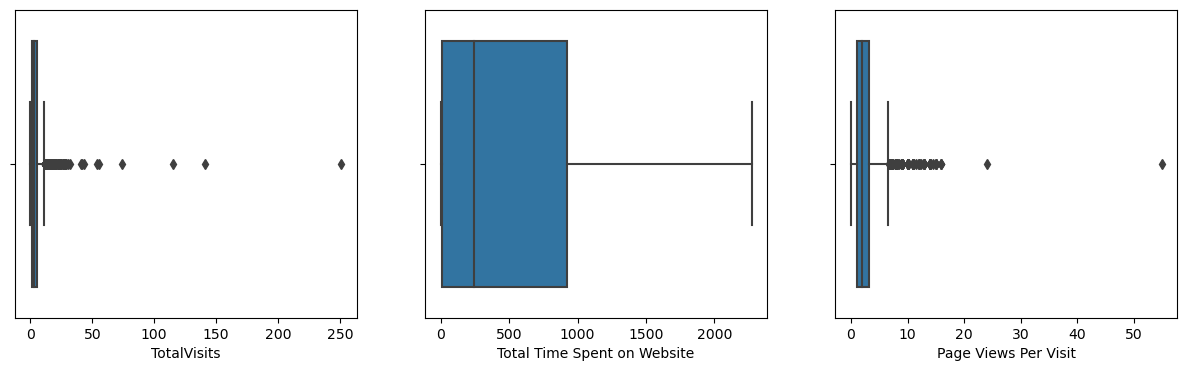

In [13]:
# Checking for outliers
plt.figure(figsize=(15,4))
var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x=i[1], data=df)

We can see that there are few outliers in "TotalVisits" and "Page Views Per Visit" columns. 
There are no outliers in "Total Time Spent on Website". Lets remove the outliers of those columns.

We are removing the outliers in 10th and 90th percentile.

In [14]:
# Finding outliers in 'TotalVisits' and 'Page Views Per Visit' columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['TotalVisits','Page Views Per Visit']
for col in col_list_outlier: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df = df.loc[(df[col] > range_low) & (df[col] < range_high)]

print(df.shape)

# Number of rows lost
print(9240-len(df.index))
# Percentage of rows lost
print(100 - 100*(len(df.index)/9240))

(8970, 24)
270
2.922077922077932


#### Average `Total Time Spent on Website` of the converted and non converted customers

In [15]:
# Converted time spent on website in hours
df_converted = df[df['Converted']==1]
Converted_time_spent = round((sum(df_converted['Total Time Spent on Website'])/len(df_converted.index))/60)
print("Converted_time_spent-",Converted_time_spent)

# Non Converted time spent on website in hours
df_not_converted = df[df['Converted']==0]
Not_Converted_time_spent = round((sum(df_not_converted['Total Time Spent on Website'])/len(df_not_converted.index))/60)
print("Not_Converted_time_spent-",Not_Converted_time_spent)

Converted_time_spent- 12
Not_Converted_time_spent- 5


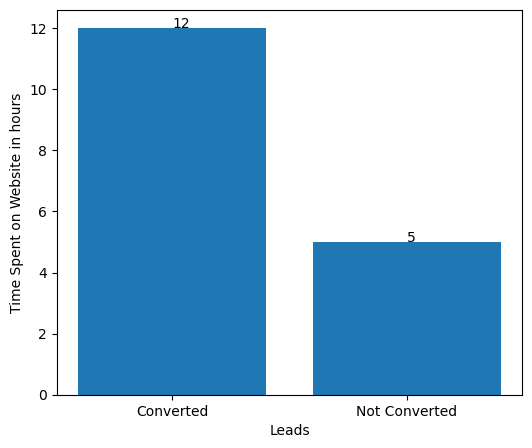

In [16]:
# Plotting
plt.figure(figsize=(6,5))
plt.bar(['Converted', 'Not Converted'], [Converted_time_spent, Not_Converted_time_spent])
plt.annotate(Converted_time_spent, xy=('Converted',Converted_time_spent))
plt.annotate(Not_Converted_time_spent, xy=('Not Converted',Not_Converted_time_spent))
plt.xlabel('Leads')
plt.ylabel('Time Spent on Website in hours')
plt.show()

#### Average `TotalVisits` of the converted and not converted customers

In [17]:
# Converted TotalVisits
df_converted_TotalVisits = df[df['Converted']==1]
Converted_TotalVisits = round(sum(df_converted_TotalVisits['TotalVisits'])/len(df_converted_TotalVisits.index),2)
print("Converted_TotalVisits-",Converted_TotalVisits)

# Not Converted TotalVisits
df_not_converted_TotalVisits = df[df['Converted']==0]
Not_Converted_TotalVisits = round(sum(df_not_converted_TotalVisits['TotalVisits'])/len(df_not_converted_TotalVisits.index),2)
print("Not_Converted_TotalVisits-",Not_Converted_TotalVisits)

Converted_TotalVisits- 3.38
Not_Converted_TotalVisits- 3.08


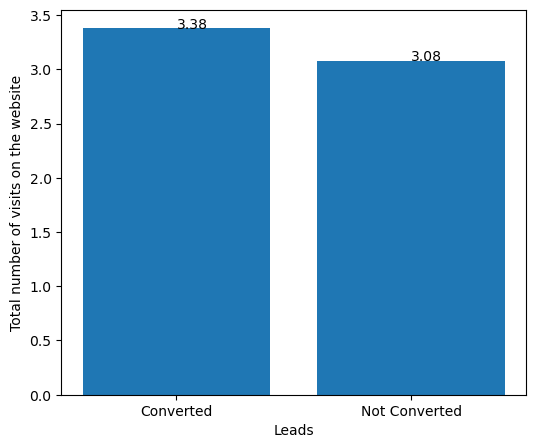

In [18]:
# Plotting
plt.figure(figsize=(6,5))
plt.bar(['Converted', 'Not Converted'], [Converted_TotalVisits, Not_Converted_TotalVisits])
plt.annotate(Converted_TotalVisits, xy=('Converted',Converted_TotalVisits))
plt.annotate(Not_Converted_TotalVisits, xy=('Not Converted',Not_Converted_TotalVisits))
plt.xlabel('Leads')
plt.ylabel('Total number of visits on the website')
plt.show()

We can see that there is not much difference of the Converted and Not-Converted customers based on their total number of visits on the website.
#### Average `Page Views Per Visit` of the converted and not converted customers

In [19]:
# Converted Page Views Per Visit
df_converted_page_views = df[df['Converted']==1]
Converted_page_views = round(sum(df_converted_page_views['Page Views Per Visit'])/len(df_converted_page_views.index),2)
print("Converted_page_views-",Converted_page_views)

# Not Converted Page Views Per Visit
df_not_converted_page_views = df[df['Converted']==0]
Not_Converted_page_views = round(sum(df_not_converted_page_views['Page Views Per Visit'])/len(df_not_converted_page_views.index),2)
print("Not_Converted_page_views-",Not_Converted_page_views)

Converted_page_views- 2.32
Not_Converted_page_views- 2.31


We can see that there is not much difference of the Converted and Not-Converted customers based on their Page Views Per Visit.

In [20]:
#Checking the value counts of the categorical columns
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print()

Value counts for column 'Prospect ID':
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
7ab69b44-70fe-438a-ae2e-0c36ae7a24e5    1
e02efa11-5bf6-40ee-9194-75d3fffef1d3    1
297fd0fa-69e5-49cf-b794-94c103e388d7    1
9757ace3-0656-4400-b519-fe0e3c67599e    1
                                       ..
3fcbb1fc-9bc1-4784-8577-e20cce001269    1
a2e576e3-85d8-4a65-8203-af3cd1875357    1
9b72f990-22a8-4460-a1e9-cc5c10c5106d    1
f66151d2-e0b3-4658-a801-4c097ef5dbf2    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 8970, dtype: int64

Value counts for column 'Lead Number':
660737    1
602415    1
602451    1
602442    1
602438    1
         ..
630168    1
630170    1
630193    1
630200    1
579533    1
Name: Lead Number, Length: 8970, dtype: int64

Value counts for column 'Lead Origin':
Landing Page Submission    4802
API                        3558
Lead Add Form               580
Lead Import                  30
Name: Lead Origin, dtype: int64

Value counts for column 'Lead Sour

In [21]:
# We see that "Google" and "google" considers a different values.
# Renaming "google" to "Google"
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

# We can also see in the `Lead Source` column that few values such as testone, 
# youtubechannel etc are in very low in counts. Even `Facebook` has very low counts compared to other sources. 
# We are combining these unique values to a name called `Other`.

# Combining the lower counts in "Other"

df = df.replace({'Lead Source': {'Facebook':'Other', 'bing':'Other', 'Click2call':'Other', 'Live Chat':'Other',
                                          'Social Media':'Other', 'Press_Release':'Other', 'Pay per Click Ads':'Other',
                                          'WeLearn':'Other', 'WeLearn':'Other', 'youtubechannel':'Other', 'NC_EDM':'Other',
                                          'blog':'Other', 'testone':'Other', 'welearnblog_Home':'Other'}})

# We can also see in the `Last Activity` column that few values such as Resubscribed to emails are in very low in counts.
# We are combining these unique values to a name called `Other`.

# Combining the lower counts in "Other"
df = df.replace({'Last Activity':{'Had a Phone Conversation':'Other', 'View in browser link Clicked':'Other',
                                 'Approached upfront':'Other', 'Email Received':'Other', 'Email Marked Spam':'Other',
                                 'Visited Booth in Tradeshow':'Other', 'Resubscribed to emails':'Other'}})

# We can also see in the `Last Notable Activity` column that few values such as Form Submitted on Website are in very low in counts.
# We are combining these unique values to a name called `Other`.

# Combining the lower counts in "Other"
df = df.replace({'Last Notable Activity':{'Unreachable':'Other', 'Had a Phone Conversation':'Other', 'Email Marked Spam':'Other',
                                         'View in browser link Clicked':'Other','Email Received':'Other',
                                         'Approached upfront':'Other','Resubscribed to emails':'Other',
                                         'Resubscribed to emails':'Other','Form Submitted on Website':'Other'}})
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,No,No,No,No,Other
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,No,No,No,No,No,No,SMS Sent


#### Dropping few columns having only one values which does not provide such information
We can that in the below coulmns the `Yes` count is either very low (almost negligible) or there is no "Yes" value.
So, we can remove these columns as there is no role playing by these columns to build our analysis and model. 

1. 'Do Not Call' Yes count = 2
2. 'Search' Yes count = 13
3. 'Magazine' Yes count= 0
4. 'Newspaper Article'  Yes = 1
5. 'X Education Forums'  Yes = 0
6.  'Newspaper'   Yes = 1
7. 'Digital Advertisement' Yes = 3
8. 'Through Recommendations'  Yes = 6
9. 'Receive More Updates About Our Courses'  Yes = 0
10. 'Update me on Supply Chain Content'  Yes = 0
11. 'Get updates on DM Content'  Yes = 0
12. 'I agree to pay the amount through cheque' Yes = 0
13. 'Prospect ID' also not needed


In [22]:
df = df.drop(['Prospect ID','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
             'Digital Advertisement', 'Receive More Updates About Our Courses',
             'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' ], axis=1)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,No,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,No,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,No,No,Modified


In [23]:
# converting yes : 1 and No :0 
# mapping the value of high low and medium
df = df.replace({'No': 0, 'Yes': 1})
# df = df.replace({'01.High':'High', '03.Low': 'Low','02.Medium':'Medium'})
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,0,Modified


# EDA 
#### Univariate Analysis


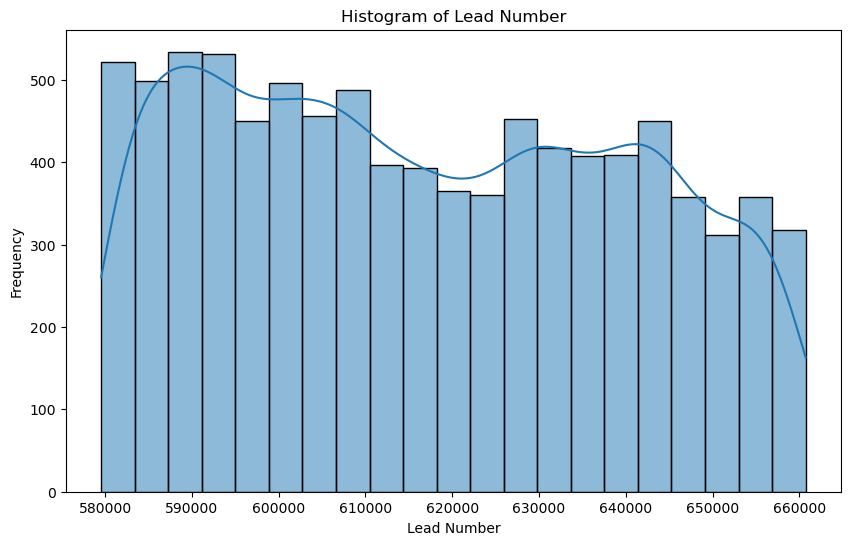

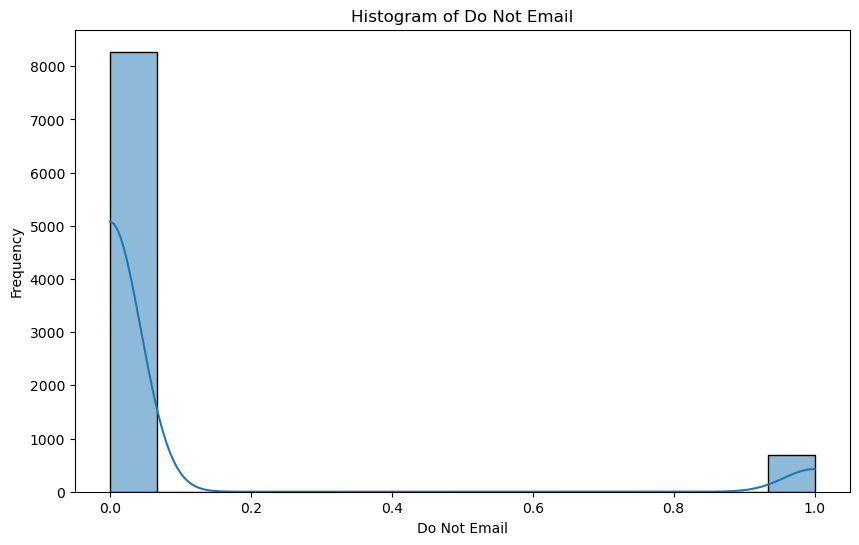

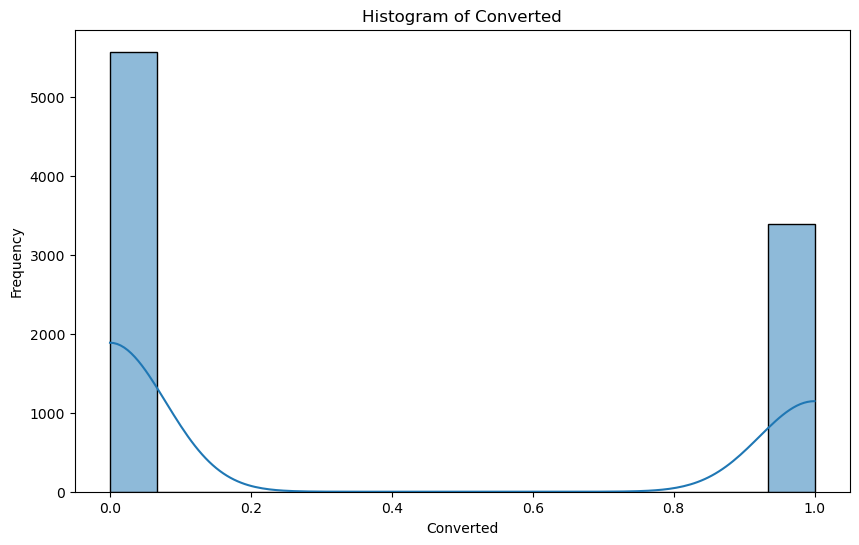

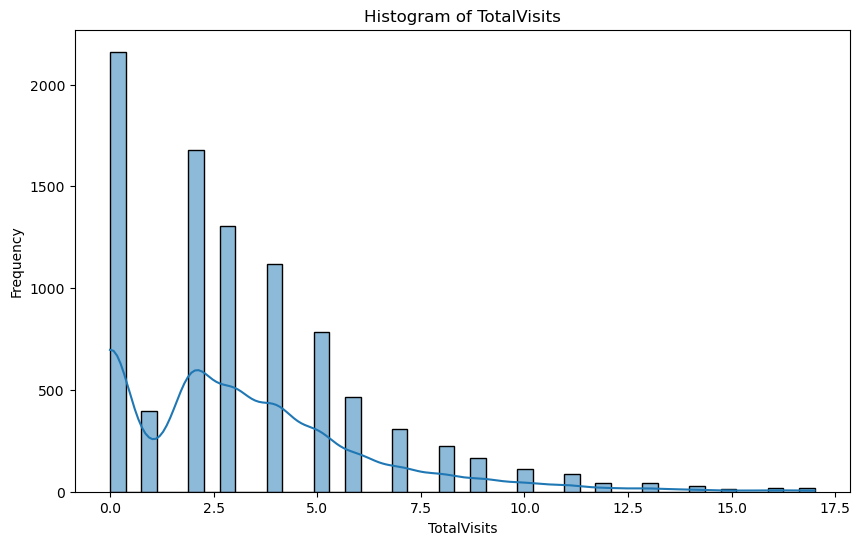

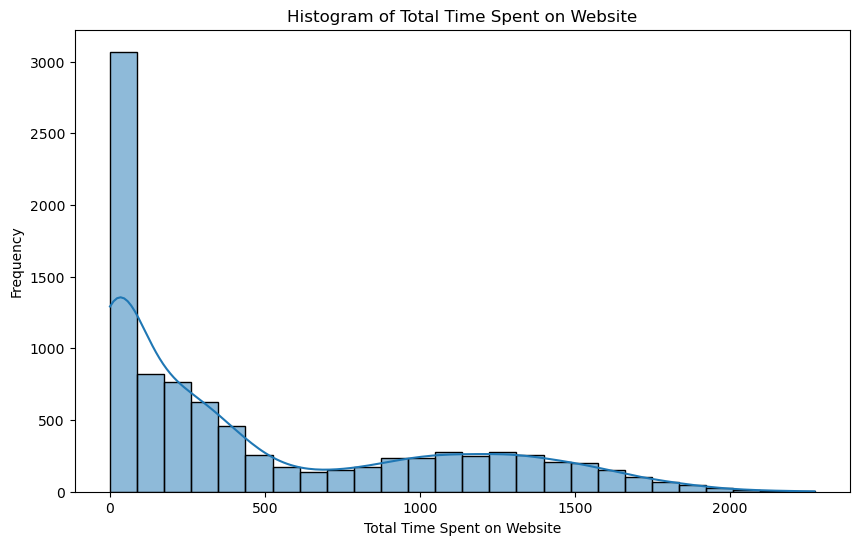

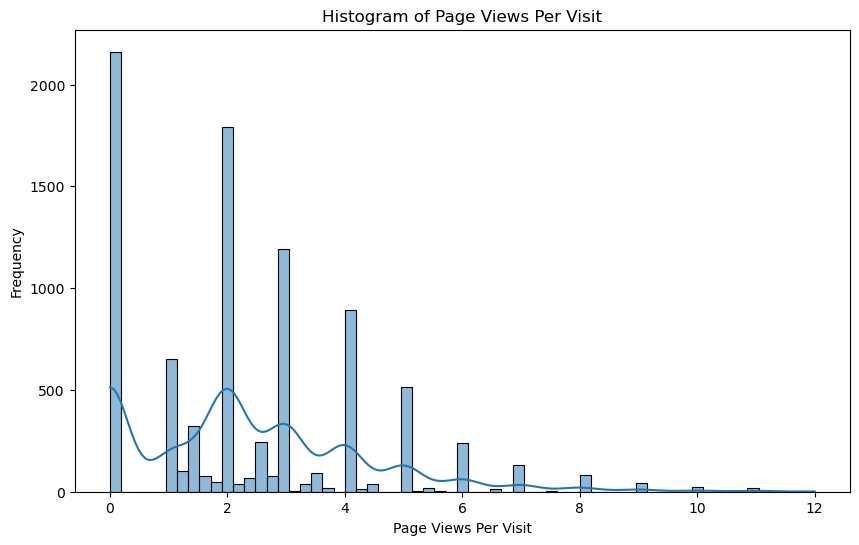

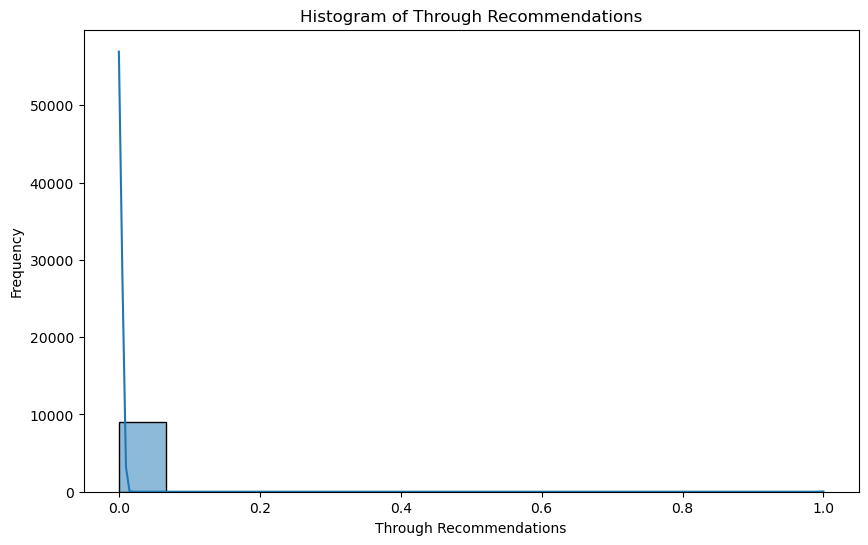

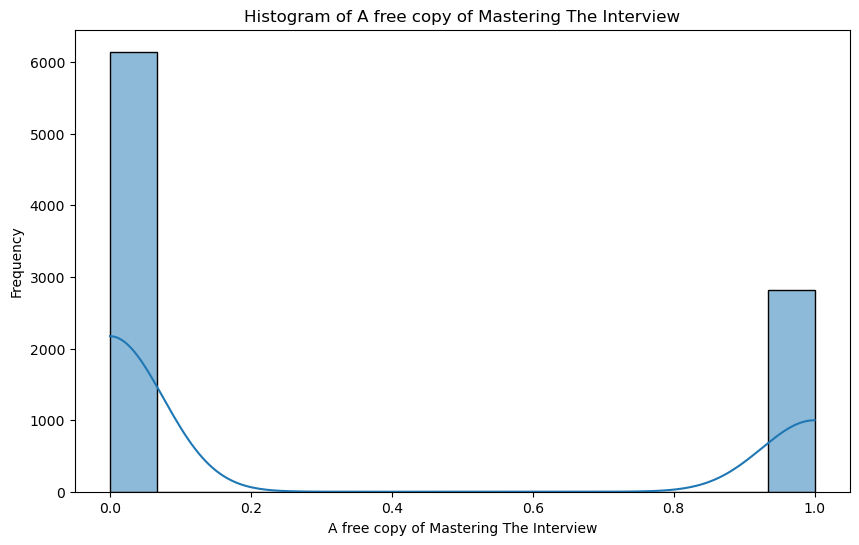

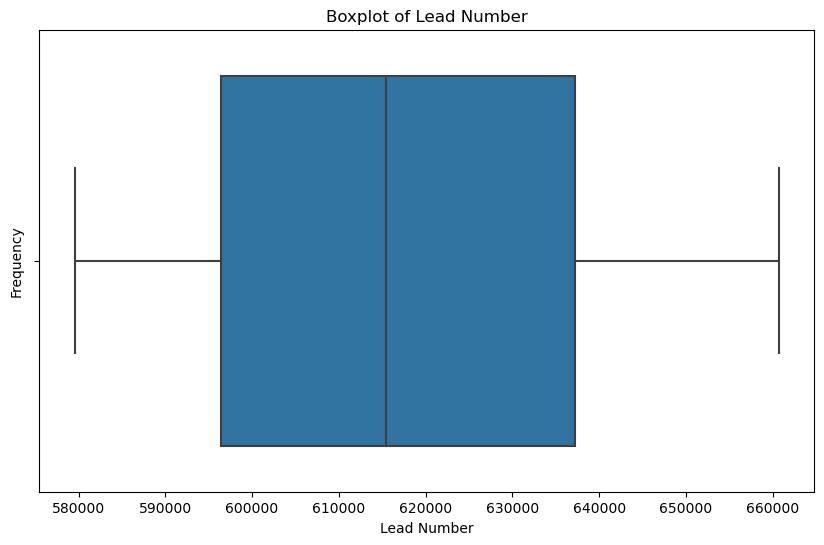

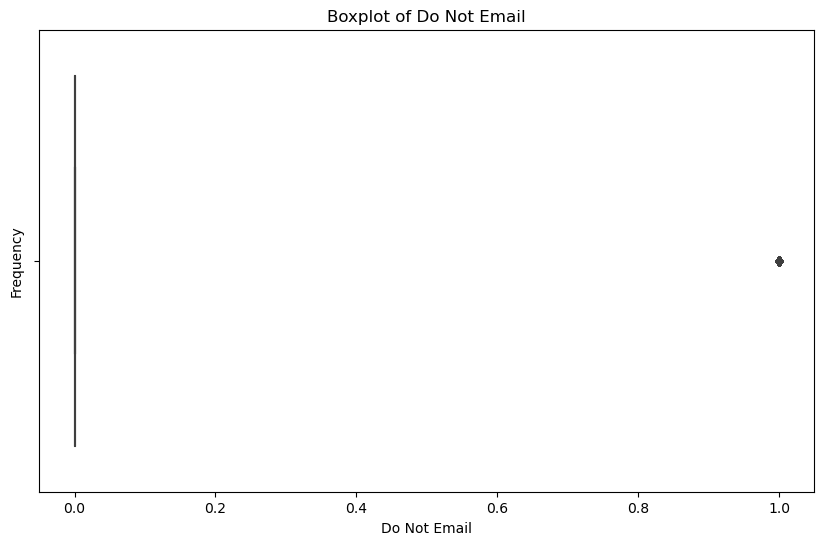

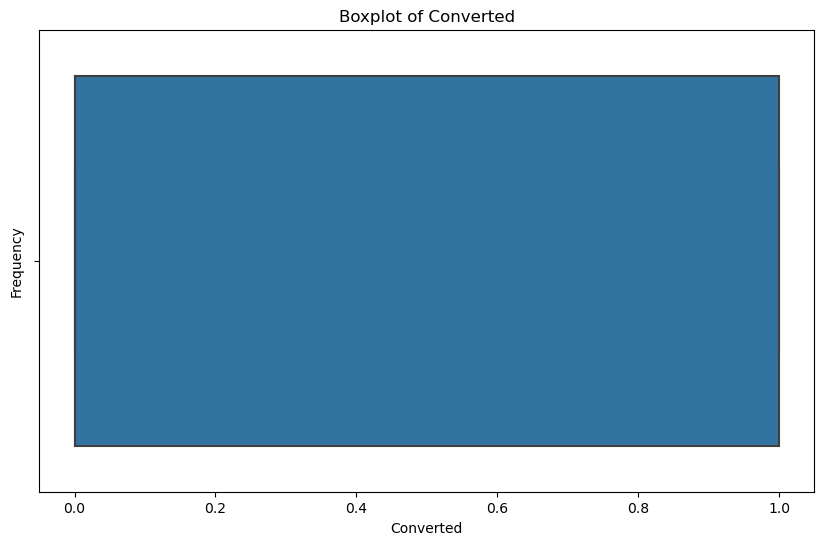

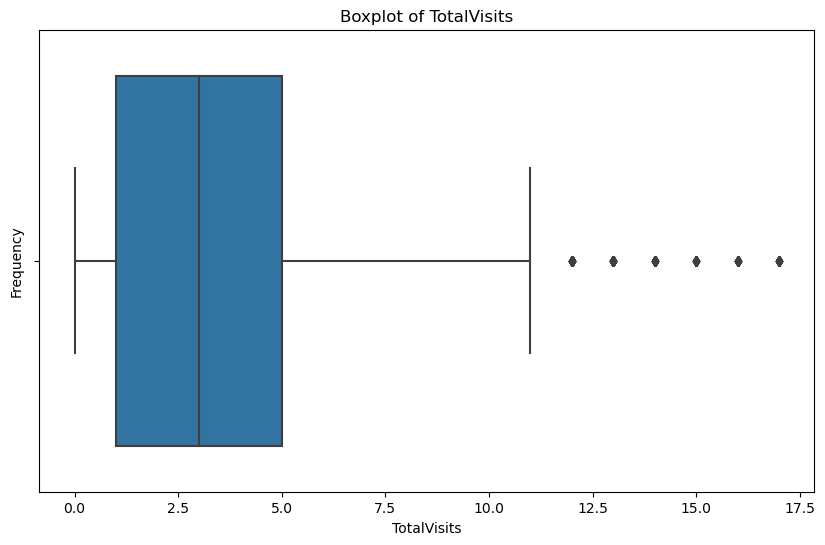

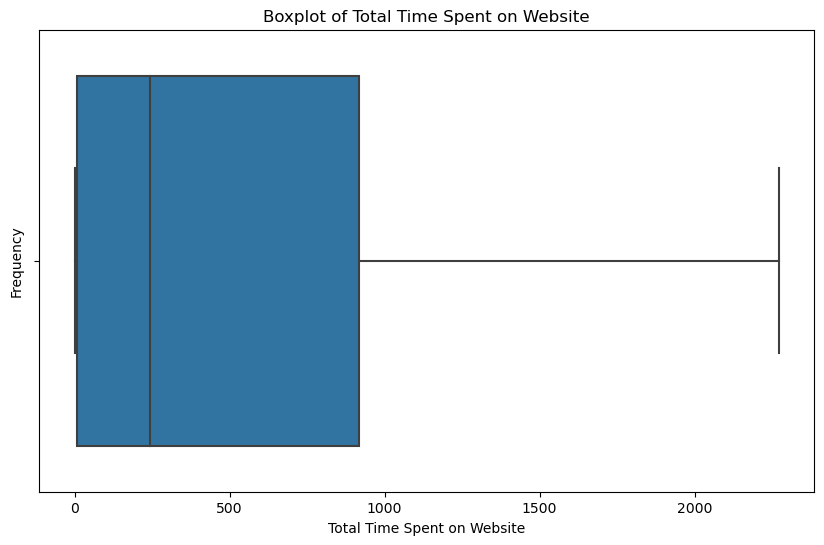

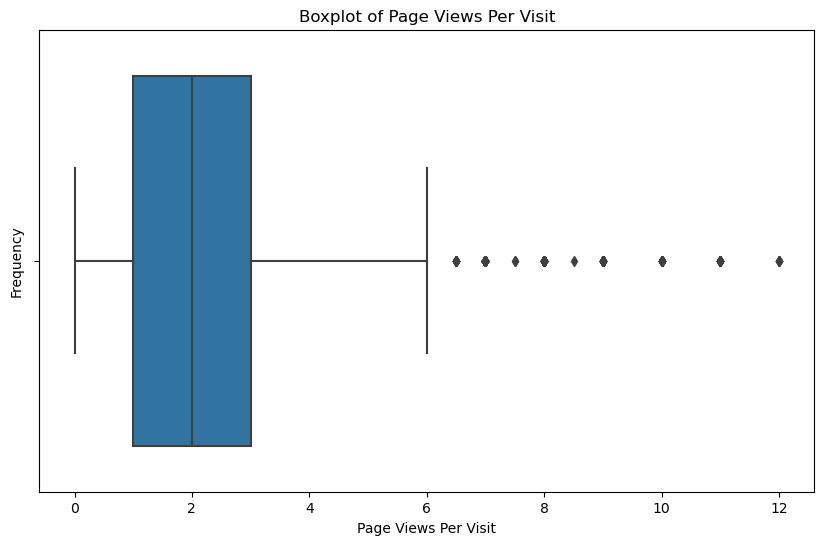

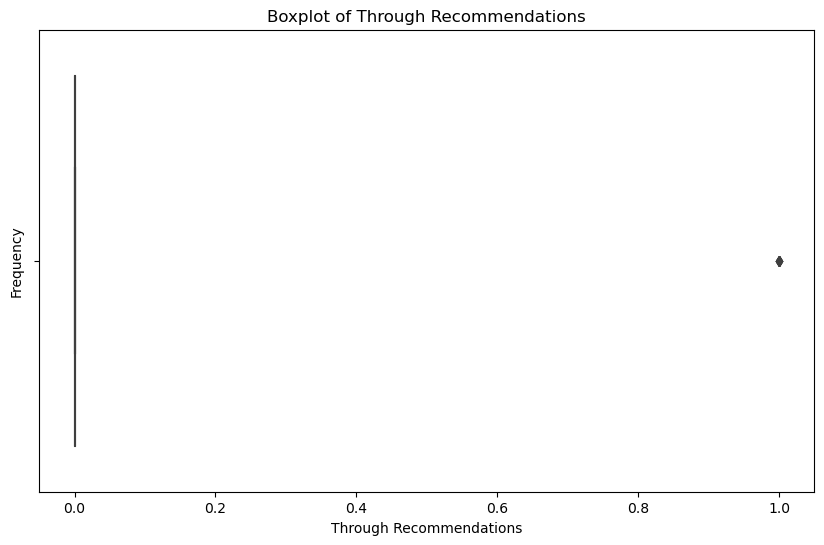

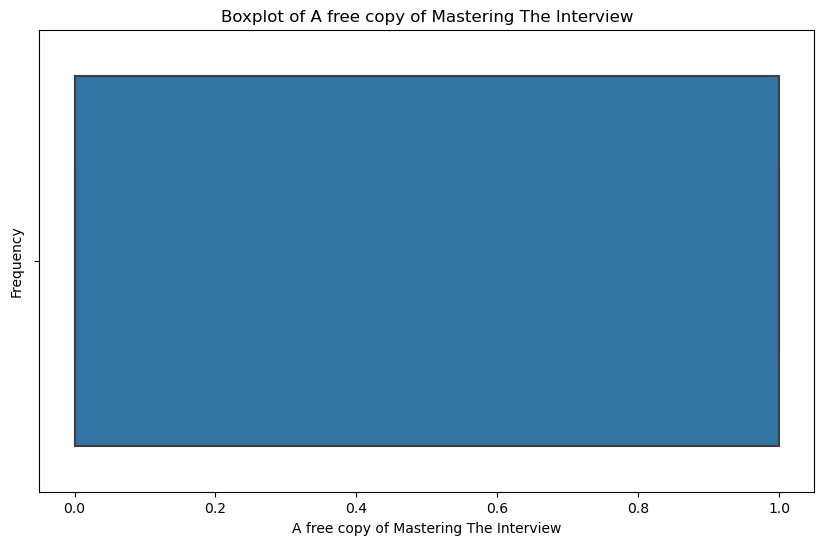

In [24]:
# Select columns with integer and float data types
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Plot histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Adjust figure size 
    sns.histplot(data=df, x=column, kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()
    
# Plot Boxplot for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Adjust figure size 
    sns.boxplot(data=df, x=column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Boxplot of {column}')
    plt.show()

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'], dtype='object')


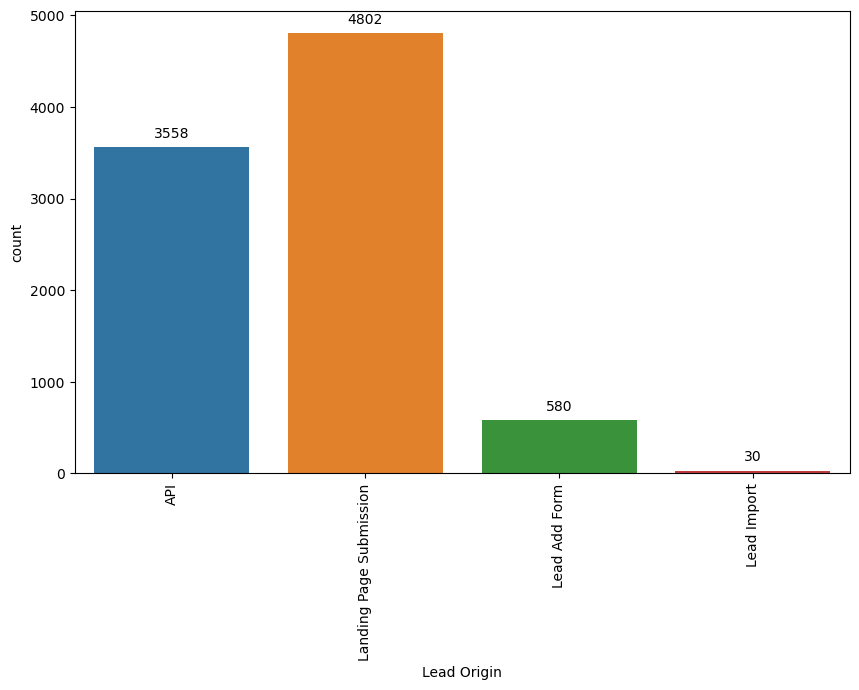

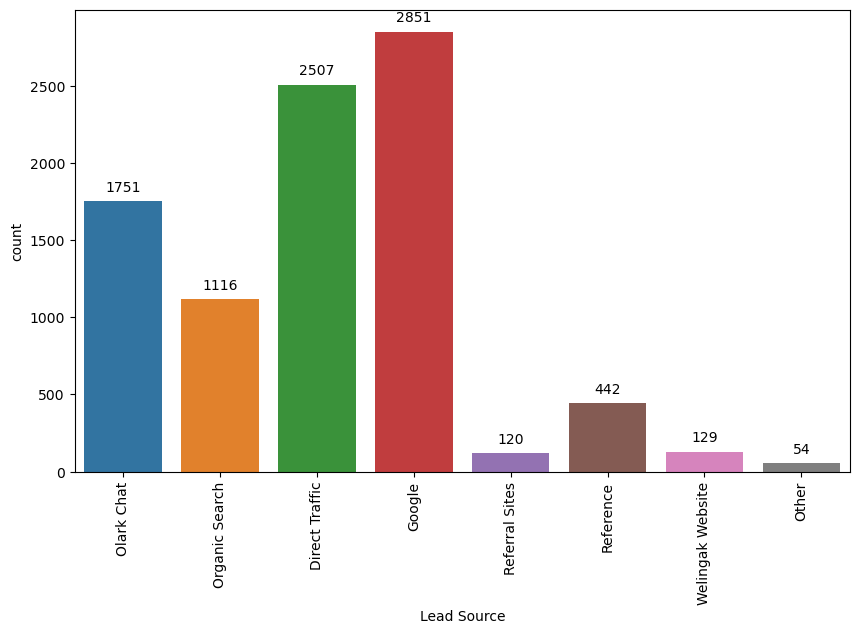

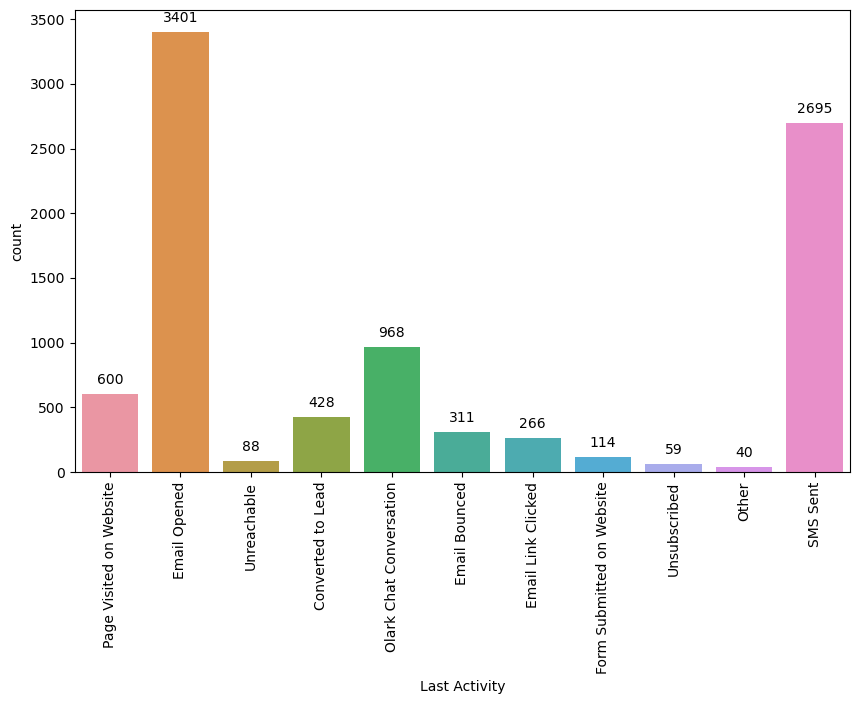

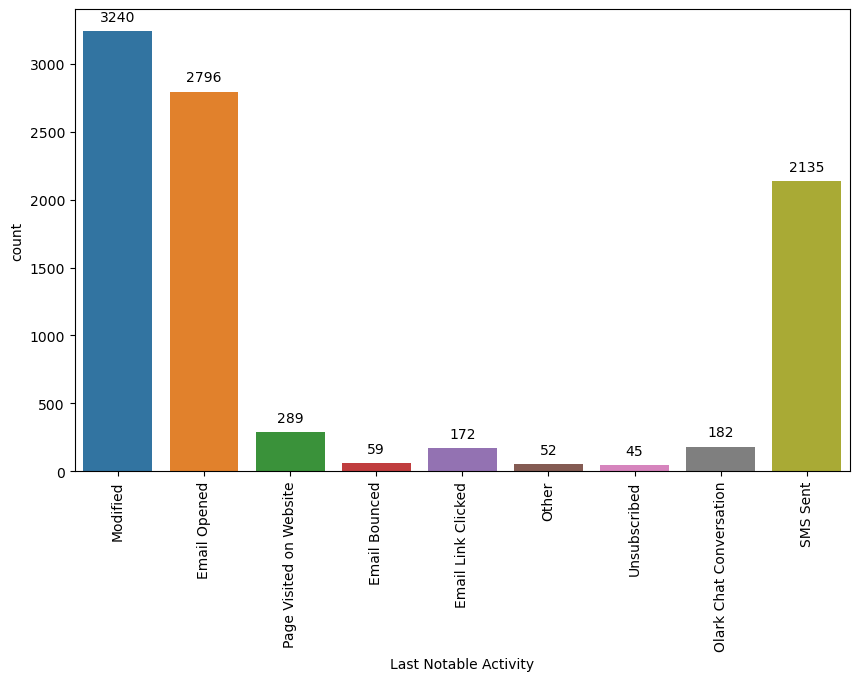

In [25]:
# Select columns with integer and float data types
object_cols = df.select_dtypes(include=['object'])
print(object_cols.columns)

# Plot count plots for each object column
for column in object_cols: 
    plt.figure(figsize=(10, 6))  # Adjust figure size
    ax = sns.countplot(x=df[column])
    plt.xticks(rotation=90)  # Rotate x-axis labels to be vertical
    
    # Add annotations
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
    plt.show()

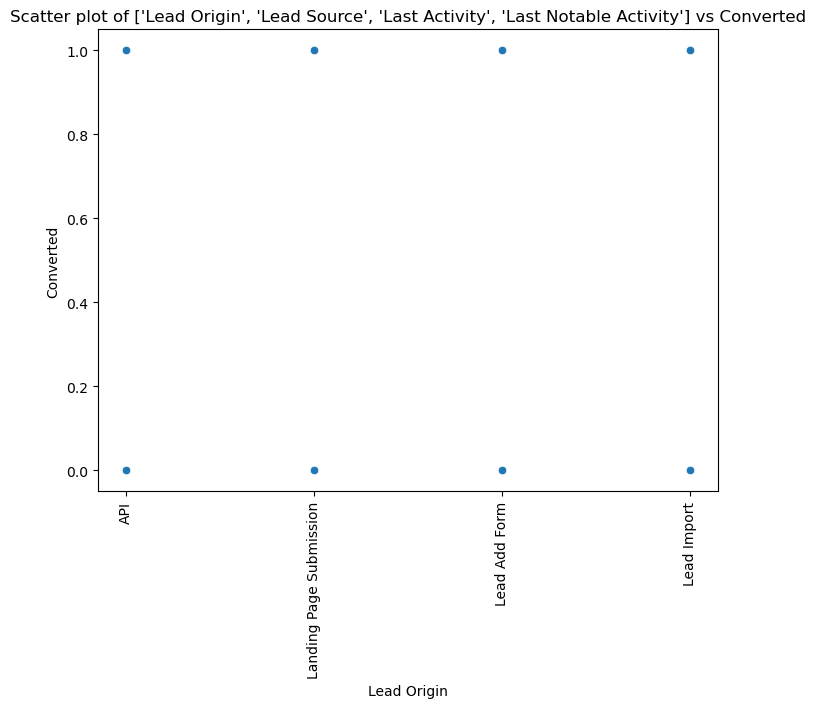

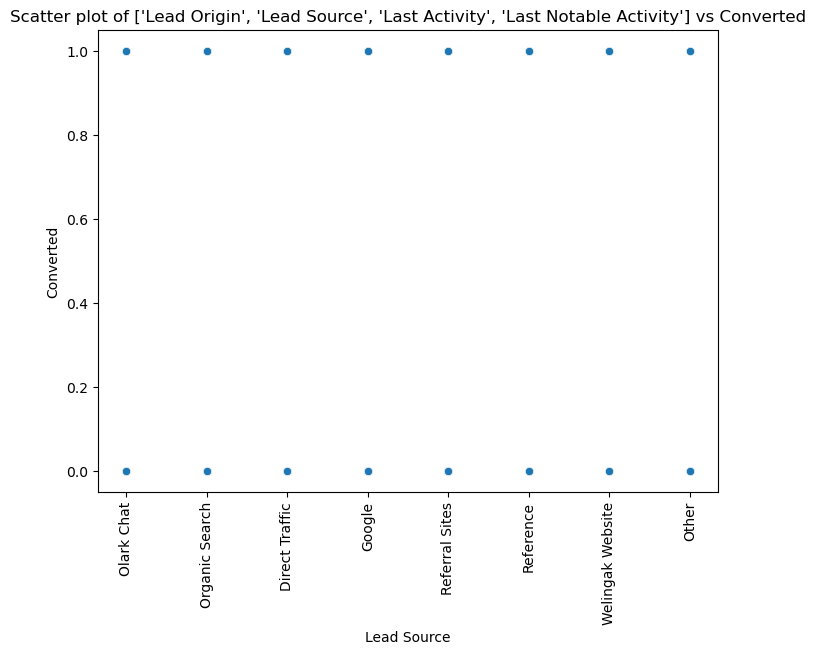

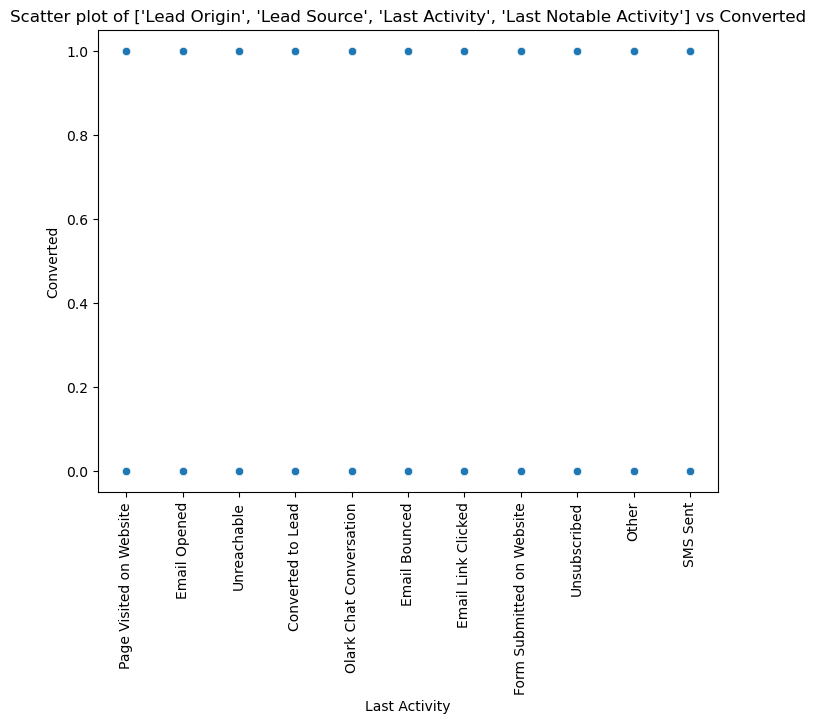

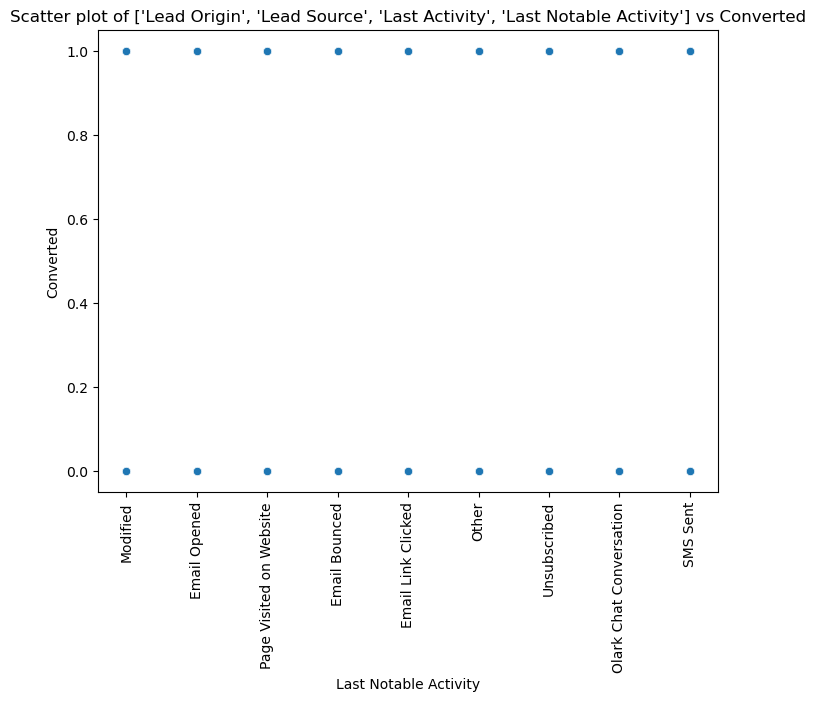

In [26]:
# Define the list of features
temp_features = ['Lead Origin', 'Lead Source', 'Last Activity',
       'Last Notable Activity']
# Plot scatter plots for each feature against 'Converted'
for i in temp_features:
    plt.figure(figsize=(8, 6))
    ax = sns.scatterplot(data=df, x=i, y='Converted')
    plt.title(f'Scatter plot of {temp_features} vs Converted')
    plt.xticks(rotation=90)
    plt.ylabel('Converted')
    plt.show()


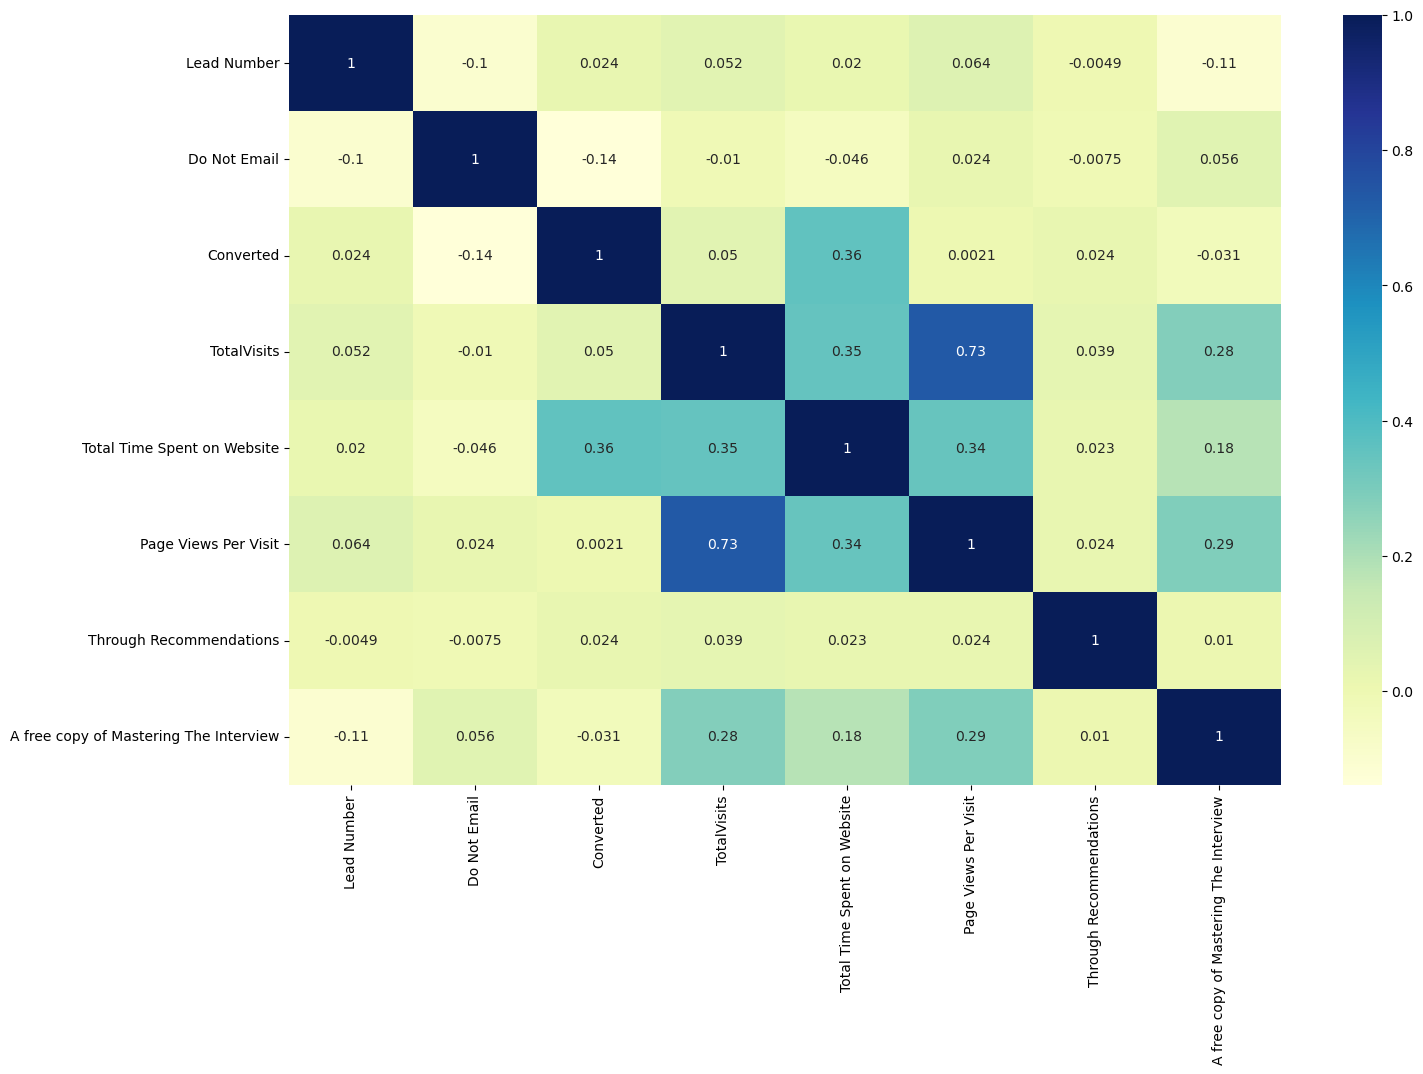

In [27]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Bivariate Analysis

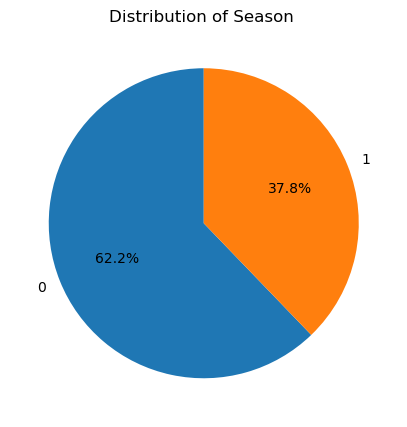

In [28]:
# pie chart for  'Converted' column
Converted_cnt = df['Converted'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 8))
plt.pie(Converted_cnt, labels=Converted_cnt.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Season ')
plt.show()


Boxplot Lead Number Vs Converted


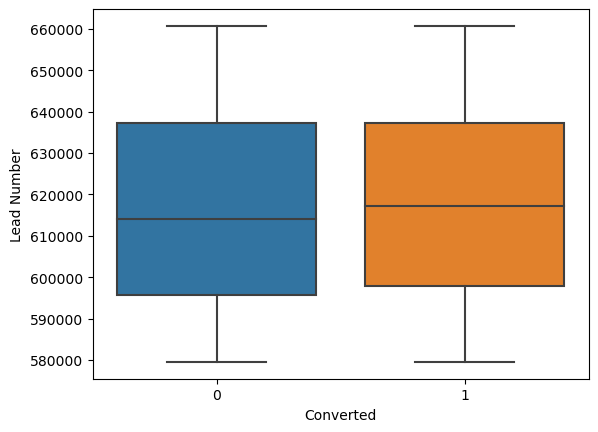

Boxplot Do Not Email Vs Converted


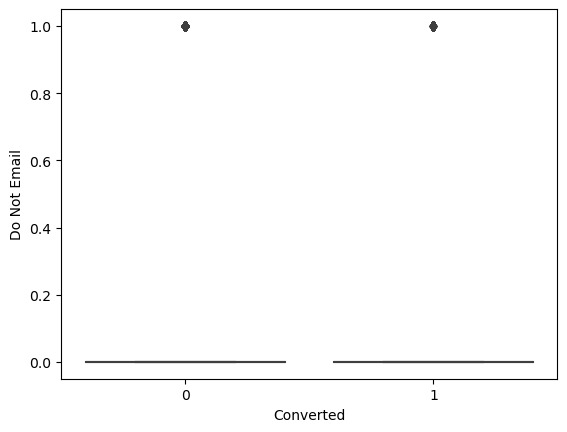

Boxplot Converted Vs Converted


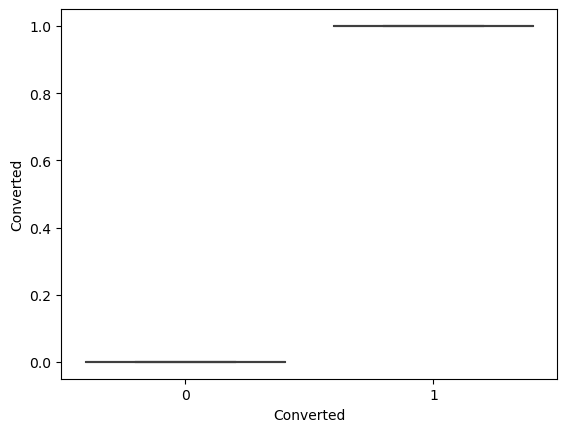

Boxplot TotalVisits Vs Converted


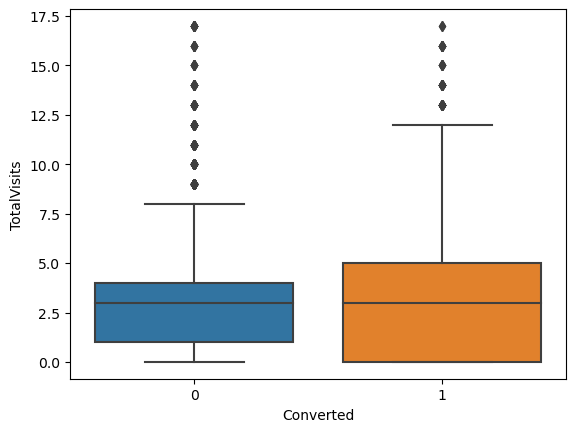

Boxplot Total Time Spent on Website Vs Converted


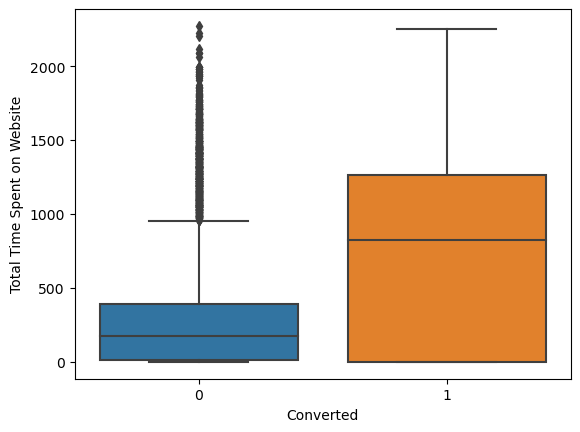

Boxplot Page Views Per Visit Vs Converted


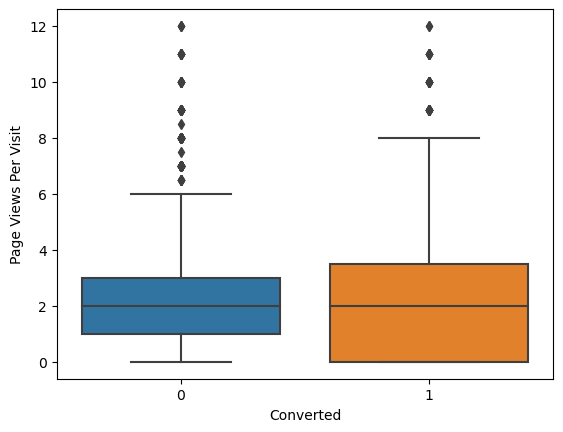

Boxplot Through Recommendations Vs Converted


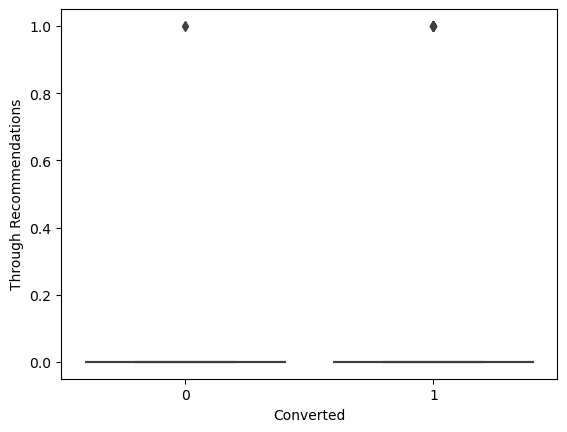

Boxplot A free copy of Mastering The Interview Vs Converted


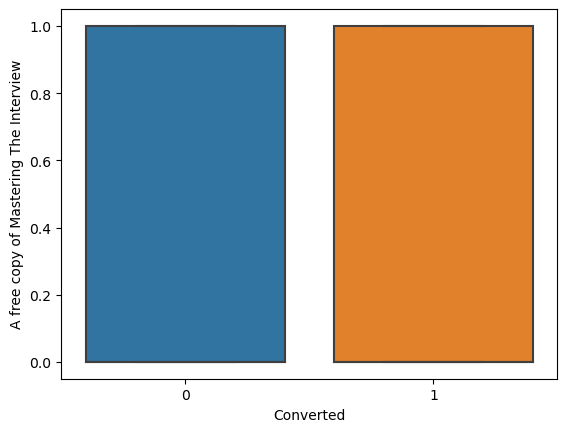

In [29]:
# As we known that our targeted variable is converted so ploting target with continuous variable
target=["Converted"]

for i in numeric_columns:
    print("Boxplot",i,"Vs","Converted")
    sns.boxplot(x=df["Converted"],y=df[i])
    plt.show()

# Pre Processing 

In [30]:
# Select columns with integer and float data types
object_cols = df.select_dtypes(include=['object'])
print(object_cols.columns)

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'], dtype='object')


In [31]:
# Dummies to be created for all categorical columns which are having more than 2 unique values
dum_cols=['Lead Origin', 'Lead Source', 'Last Activity',
       'Last Notable Activity']

# getting dummies in object columns 
dum=pd.get_dummies(df[dum_cols],drop_first=True,dtype=int)
 
#concating the dummies columns with data frame
df=pd.concat([df,dum],axis=1)

# dropping columns which have dummies in the data
df = df.drop(dum_cols,axis=1)

df

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,660737,0,0,0.0,0,0.00,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,660728,0,0,5.0,674,2.50,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.00,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.00,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,660681,0,1,2.0,1428,1.00,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,1,8.0,1845,2.67,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9236,579546,0,0,2.0,238,2.00,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
9237,579545,1,0,2.0,199,2.00,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
9238,579538,0,1,3.0,499,3.00,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


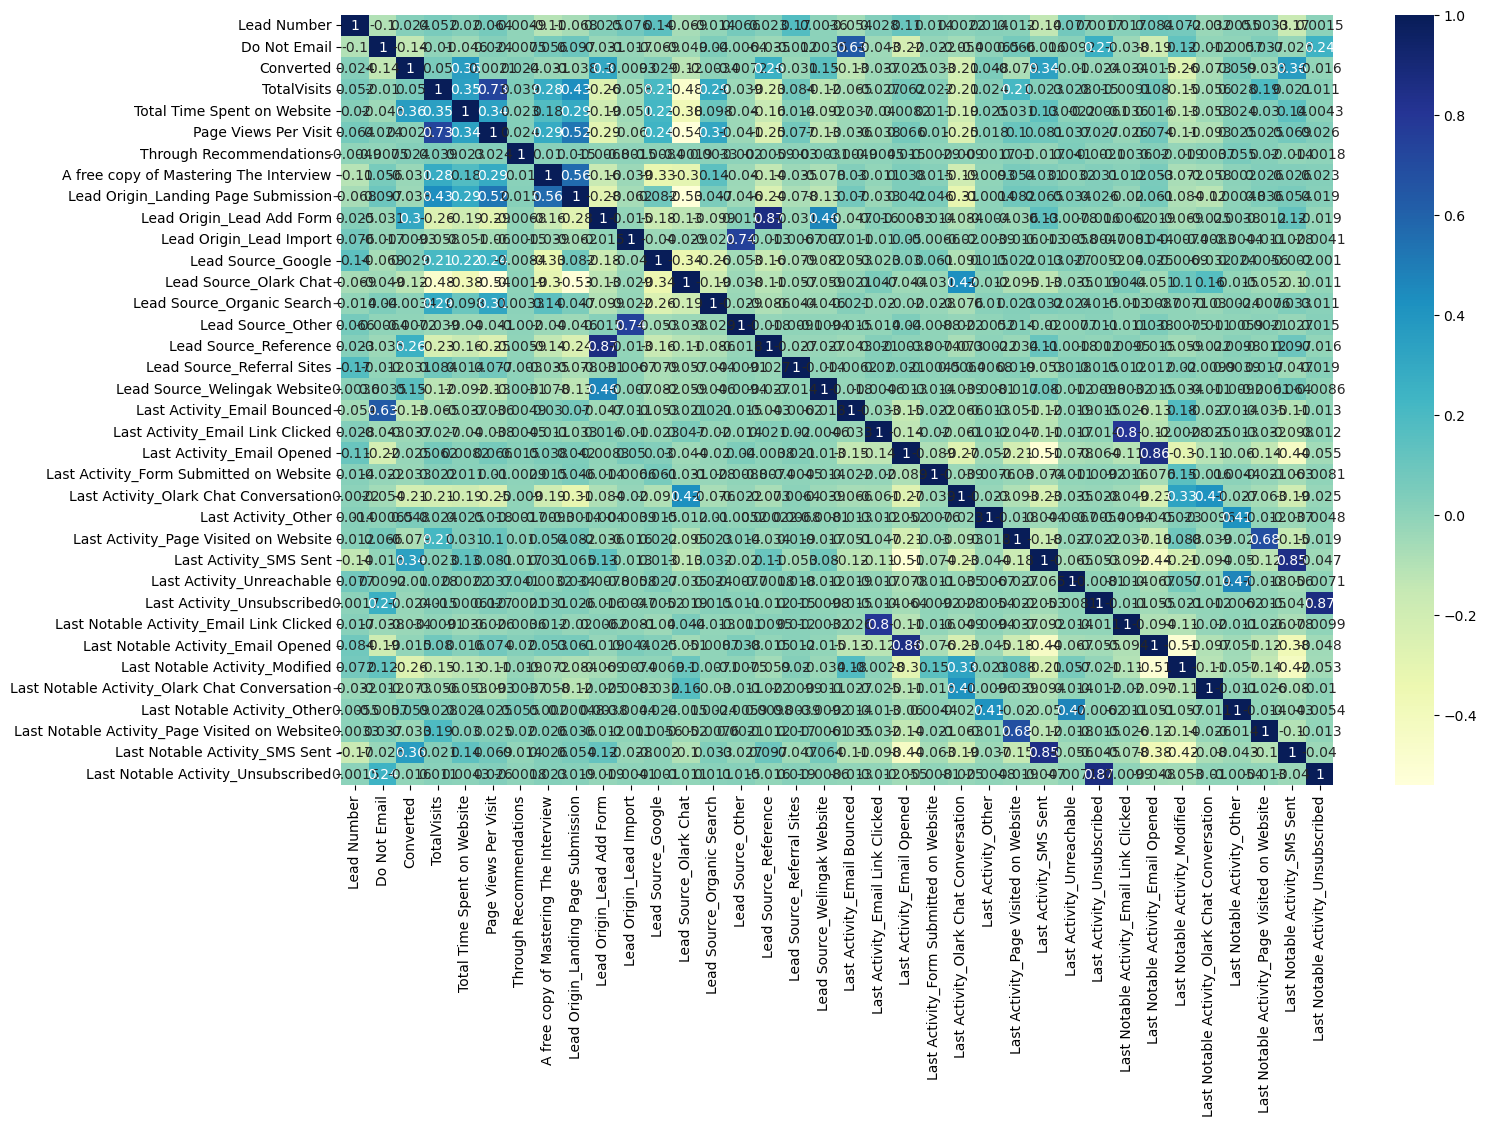

In [32]:
# Let's again check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [33]:
#initializing x and y
X=df.drop("Converted",axis=1)
y=df[target]

# importing the lib and applying train-test split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

print("Train X shape:",X_train.shape)
print("Test X shape:",X_test.shape)
print("Train y shape:",y_train.shape)
print("Test y shape:",y_test.shape)

Train X shape: (7176, 35)
Test X shape: (1794, 35)
Train y shape: (7176, 1)
Test y shape: (1794, 1)


# Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [35]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)


# Feature Selection using RFE

In [36]:
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression # Logistic Regression libraries

estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select = 20)
selector.fit(X_train_scaled,y_train)
selector.support_

# zipping the X_train_scaled columns with support and ranking
print(list(zip(X_train_scaled.columns, selector.support_, selector.ranking_)))

[('Lead Number', True, 1), ('Do Not Email', True, 1), ('TotalVisits', True, 1), ('Total Time Spent on Website', True, 1), ('Page Views Per Visit', True, 1), ('Through Recommendations', True, 1), ('A free copy of Mastering The Interview', False, 16), ('Lead Origin_Landing Page Submission', False, 8), ('Lead Origin_Lead Add Form', True, 1), ('Lead Origin_Lead Import', False, 4), ('Lead Source_Google', True, 1), ('Lead Source_Olark Chat', True, 1), ('Lead Source_Organic Search', False, 3), ('Lead Source_Other', False, 14), ('Lead Source_Reference', True, 1), ('Lead Source_Referral Sites', False, 10), ('Lead Source_Welingak Website', True, 1), ('Last Activity_Email Bounced', False, 11), ('Last Activity_Email Link Clicked', False, 5), ('Last Activity_Email Opened', True, 1), ('Last Activity_Form Submitted on Website', False, 9), ('Last Activity_Olark Chat Conversation', True, 1), ('Last Activity_Other', True, 1), ('Last Activity_Page Visited on Website', False, 7), ('Last Activity_SMS Sent'

In [37]:
# Displaying columns which are not selected by RFE:-

# creating new variable which contains the columns which i have to keep in my trained model
cols_to_keep=X_train_scaled.columns[selector.support_]

cols_to_keep

Index(['Lead Number', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Through Recommendations', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [38]:
# creating new variable which contains the columns which i have to keep in my trained model and test model 

X_train=X_train_scaled[cols_to_keep]
X_test=X_test_scaled[cols_to_keep]

# First Model

In [39]:
#importing the statsmodel 
import statsmodels.api as sm

# dding the constant in train and test data 
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [40]:
model1=sm.GLM(np.array(y_train["Converted"]),X_train_sm,family=sm.families.Binomial())
# Binomial --> Binary Classification
result1=model1.fit()
result1.summary()
#Generalised Linear Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7176
Model:                            GLM   Df Residuals:                     7155
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3125.0
Date:                Sun, 18 Feb 2024   Deviance:                       6250.0
Time:                        18:33:48   Pearson chi2:                 7.34e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3669
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6533      6.380     -0.102      0.918     -13.159      11.852
Lead Number                                       0.1567      0.033      4.766      0.000       0.092       0.221
Do Not Email                                     -0.3575      0.044     -8.037      0.000      -0.445      -0.270
TotalVisits                                       0.2645      0.047      5.601      0.000       0.172       0.357
Total Time Spent on Website                       1.1063      0.037     30.107      0.000       1.034       1.178
Page Views Per Visit                             -0.2063      0.050     -4.144      0.000      -0.304      -0.109
Through Recommendations                           0.5124    270.163      0.002      0.998    -528.997     530.022
Lead Origin_Lead Add Form                         0.5577      0.226      2.463      0.014       0.114       1.001
Lead Source_Google                                0.1252      0.034      3.698      0.000       0.059       0.191
Lead Source_Olark Chat                            0.5196      0.047     10.978      0.000       0.427       0.612
Lead Source_Reference                             0.5036      0.205      2.454      0.014       0.101       0.906
Lead Source_Welingak Website                      0.4267      0.136      3.132      0.002       0.160       0.694
Last Activity_Email Opened                        0.3176      0.074      4.289      0.000       0.172       0.463
Last Activity_Olark Chat Conversation            -0.2596      0.061     -4.285      0.000      -0.378      -0.141
Last Activity_Other                               0.1352      0.031      4.303      0.000       0.074       0.197
Last Activity_SMS Sent                            0.3805      0.065      5.891      0.000       0.254       0.507
Last Notable Activity_Email Link Clicked         -0.1863      0.038     -4.848      0.000      -0.262      -0.111
Last Notable Activity_Email Opened               -0.6269      0.081     -7.726      0.000      -0.786      -0.468
Last Notable Activity_Modified                   -0.7751      0.060    -12.961      0.000      -0.892      -0.658
Last Notable Activity_Olark Chat Conversation    -0.2169      0.051     -4.265      0.000      -0.317      -0.117
Last Notable Activity_Page Visited on Website    -0.2129      0.041     -5.145      0.000      -0.294      -0.132
=================================================================================================================
"""

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Feature,VIF
7,Lead Origin_Lead Add Form,55.274119
10,Lead Source_Reference,44.209827
11,Lead Source_Welingak Website,13.370096
17,Last Notable Activity_Email Opened,7.206700
12,Last Activity_Email Opened,5.372516
15,Last Activity_SMS Sent,3.962219
18,Last Notable Activity_Modified,3.674930
5,Page Views Per Visit,2.677730
3,TotalVisits,2.468942
9,Lead Source_Olark Chat,2.250515


***Model analysis***
1. We can see that there are few features have positive coefficients and few have negative.
2. Few features have higher p-values and hence became insignificant in the model.

***Coarse tuning (Auto+Manual)***

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

## So from model 1, we will drop 'Through Recommendation' columns

In [42]:
X_train_sm=X_train_sm.drop(["Through Recommendations"],axis=1)
X_test_sm=X_test_sm.drop(["Through Recommendations"],axis=1)

In [43]:
model2=sm.GLM(np.array(y_train["Converted"]),X_train_sm,family=sm.families.Binomial())
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7176
Model:                            GLM   Df Residuals:                     7156
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3128.3
Date:                Sun, 18 Feb 2024   Deviance:                       6256.5
Time:                        18:33:49   Pearson chi2:                 7.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3663
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6638      0.036    -18.638      0.000      -0.734      -0.594
Lead Number                                       0.1567      0.033      4.768      0.000       0.092       0.221
Do Not Email                                     -0.3577      0.044     -8.046      0.000      -0.445      -0.271
TotalVisits                                       0.2664      0.047      5.643      0.000       0.174       0.359
Total Time Spent on Website                       1.1058      0.037     30.115      0.000       1.034       1.178
Page Views Per Visit                             -0.2074      0.050     -4.171      0.000      -0.305      -0.110
Lead Origin_Lead Add Form                         0.5572      0.226      2.461      0.014       0.113       1.001
Lead Source_Google                                0.1239      0.034      3.664      0.000       0.058       0.190
Lead Source_Olark Chat                            0.5186      0.047     10.969      0.000       0.426       0.611
Lead Source_Reference                             0.5036      0.205      2.453      0.014       0.101       0.906
Lead Source_Welingak Website                      0.4266      0.136      3.132      0.002       0.160       0.694
Last Activity_Email Opened                        0.3177      0.074      4.291      0.000       0.173       0.463
Last Activity_Olark Chat Conversation            -0.2594      0.061     -4.281      0.000      -0.378      -0.141
Last Activity_Other                               0.1352      0.031      4.302      0.000       0.074       0.197
Last Activity_SMS Sent                            0.3805      0.065      5.890      0.000       0.254       0.507
Last Notable Activity_Email Link Clicked         -0.1863      0.038     -4.849      0.000      -0.262      -0.111
Last Notable Activity_Email Opened               -0.6257      0.081     -7.712      0.000      -0.785      -0.467
Last Notable Activity_Modified                   -0.7751      0.060    -12.962      0.000      -0.892      -0.658
Last Notable Activity_Olark Chat Conversation    -0.2170      0.051     -4.265      0.000      -0.317      -0.117
Last Notable Activity_Page Visited on Website    -0.2096      0.041     -5.083      0.000      -0.290      -0.129
=================================================================================================================
"""

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Feature,VIF
6,Lead Origin_Lead Add Form,55.274115
9,Lead Source_Reference,44.209543
10,Lead Source_Welingak Website,13.370008
16,Last Notable Activity_Email Opened,7.205860
11,Last Activity_Email Opened,5.372422
14,Last Activity_SMS Sent,3.962154
17,Last Notable Activity_Modified,3.674895
5,Page Views Per Visit,2.677688
3,TotalVisits,2.466226
8,Lead Source_Olark Chat,2.248955


## Similarly from the model 2, we will drop Lead Origin_Lead Add Form columns which having high VIF value

In [45]:
X_train_sm=X_train_sm.drop(["Lead Origin_Lead Add Form"],axis=1)
X_test_sm=X_test_sm.drop(["Lead Origin_Lead Add Form"],axis=1)

In [46]:
model3=sm.GLM(np.array(y_train["Converted"]),X_train_sm,family=sm.families.Binomial())
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7176
Model:                            GLM   Df Residuals:                     7157
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3131.7
Date:                Sun, 18 Feb 2024   Deviance:                       6263.3
Time:                        18:33:49   Pearson chi2:                 7.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3657
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6635      0.036    -18.640      0.000      -0.733      -0.594
Lead Number                                       0.1595      0.033      4.859      0.000       0.095       0.224
Do Not Email                                     -0.3583      0.044     -8.061      0.000      -0.445      -0.271
TotalVisits                                       0.2653      0.047      5.637      0.000       0.173       0.358
Total Time Spent on Website                       1.1032      0.037     30.096      0.000       1.031       1.175
Page Views Per Visit                             -0.2128      0.050     -4.286      0.000      -0.310      -0.115
Lead Source_Google                                0.1219      0.034      3.607      0.000       0.056       0.188
Lead Source_Olark Chat                            0.5131      0.047     10.888      0.000       0.421       0.606
Lead Source_Reference                             0.9926      0.052     19.114      0.000       0.891       1.094
Lead Source_Welingak Website                      0.6882      0.085      8.070      0.000       0.521       0.855
Last Activity_Email Opened                        0.3200      0.074      4.326      0.000       0.175       0.465
Last Activity_Olark Chat Conversation            -0.2597      0.061     -4.289      0.000      -0.378      -0.141
Last Activity_Other                               0.1352      0.031      4.302      0.000       0.074       0.197
Last Activity_SMS Sent                            0.3811      0.065      5.906      0.000       0.255       0.508
Last Notable Activity_Email Link Clicked         -0.1868      0.038     -4.864      0.000      -0.262      -0.112
Last Notable Activity_Email Opened               -0.6274      0.081     -7.736      0.000      -0.786      -0.468
Last Notable Activity_Modified                   -0.7768      0.060    -12.996      0.000      -0.894      -0.660
Last Notable Activity_Olark Chat Conversation    -0.2170      0.051     -4.269      0.000      -0.317      -0.117
Last Notable Activity_Page Visited on Website    -0.2100      0.041     -5.097      0.000      -0.291      -0.129
=================================================================================================================
"""

In [47]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Feature,VIF
15,Last Notable Activity_Email Opened,7.205401
10,Last Activity_Email Opened,5.371994
13,Last Activity_SMS Sent,3.962154
16,Last Notable Activity_Modified,3.674507
5,Page Views Per Visit,2.673654
3,TotalVisits,2.466012
7,Lead Source_Olark Chat,2.248013
11,Last Activity_Olark Chat Conversation,2.119548
18,Last Notable Activity_Page Visited on Website,1.642843
17,Last Notable Activity_Olark Chat Conversation,1.509901


wow... from the above analysis clearly we can observe that after droping Lead Origin_Lead Add Form column there is huge variation in vif values. now we have to drop Last Notable Activity_Email Opened because it has large vif value

In [48]:
X_train_sm=X_train_sm.drop(["Last Notable Activity_Email Opened"],axis=1)
X_test_sm=X_test_sm.drop(["Last Notable Activity_Email Opened"],axis=1)

In [49]:
model4=sm.GLM(np.array(y_train["Converted"]),X_train_sm,family=sm.families.Binomial())
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7176
Model:                            GLM   Df Residuals:                     7158
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3161.3
Date:                Sun, 18 Feb 2024   Deviance:                       6322.5
Time:                        18:33:49   Pearson chi2:                 7.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3604
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6615      0.035    -18.673      0.000      -0.731      -0.592
Lead Number                                       0.1425      0.033      4.375      0.000       0.079       0.206
Do Not Email                                     -0.3255      0.044     -7.482      0.000      -0.411      -0.240
TotalVisits                                       0.2546      0.047      5.438      0.000       0.163       0.346
Total Time Spent on Website                       1.1064      0.037     30.299      0.000       1.035       1.178
Page Views Per Visit                             -0.2057      0.049     -4.171      0.000      -0.302      -0.109
Lead Source_Google                                0.1240      0.034      3.694      0.000       0.058       0.190
Lead Source_Olark Chat                            0.5236      0.047     11.168      0.000       0.432       0.616
Lead Source_Reference                             1.0042      0.052     19.271      0.000       0.902       1.106
Lead Source_Welingak Website                      0.6833      0.085      8.019      0.000       0.516       0.850
Last Activity_Email Opened                       -0.0051      0.063     -0.080      0.936      -0.129       0.119
Last Activity_Olark Chat Conversation            -0.2830      0.060     -4.697      0.000      -0.401      -0.165
Last Activity_Other                               0.1462      0.030      4.818      0.000       0.087       0.206
Last Activity_SMS Sent                            0.5763      0.059      9.838      0.000       0.462       0.691
Last Notable Activity_Email Link Clicked         -0.1093      0.037     -2.955      0.003      -0.182      -0.037
Last Notable Activity_Modified                   -0.4698      0.043    -10.830      0.000      -0.555      -0.385
Last Notable Activity_Olark Chat Conversation    -0.1284      0.049     -2.601      0.009      -0.225      -0.032
Last Notable Activity_Page Visited on Website    -0.1095      0.039     -2.816      0.005      -0.186      -0.033
=================================================================================================================
"""

In [50]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,Feature,VIF
10,Last Activity_Email Opened,3.627865
13,Last Activity_SMS Sent,3.210785
5,Page Views Per Visit,2.673010
3,TotalVisits,2.464968
7,Lead Source_Olark Chat,2.242363
11,Last Activity_Olark Chat Conversation,2.112919
15,Last Notable Activity_Modified,1.944498
17,Last Notable Activity_Page Visited on Website,1.450891
16,Last Notable Activity_Olark Chat Conversation,1.366910
8,Lead Source_Reference,1.361166


#### Now futher clearly visible that no feature have vif value greater than 5 and p values are also less than 0.05. so no need to drop any feature from the model 
We can see that VIFs of all the variables are below 3. So, we can say that there is no multicollinearity in the columns we have selected.

##### Top 5 variables with highest coefficients
1. Total Time Spent on Website
2. Lead Source_Reference
3. Lead Source_Welingak Website
4. Last Activity_SMS Sent
5. Lead Source_Olark Chat

In [51]:
# Getting the predicted value on the train set
y_train_pred = result4.predict(X_train_sm)
y_train_pred.head()

0    0.066114
1    0.021312
2    0.333193
3    0.973486
4    0.339611
dtype: float64

In [52]:
##### Creating a dataframe with the actual converted and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train["Converted"].values, 'Converted_Prob':y_train_pred.values})
# Assigning Customer ID for each records
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.066114,4143
1,0,0.021312,8875
2,0,0.333193,1587
3,1,0.973486,6977
4,0,0.339611,3386


# Finding Optimal Probablity Cutoff Point

In [53]:
# Let's create columns with different probability cutoffs 
numbers = [float(x/10) for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Converted_Prob'].map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.066114,4143,1,0,0,0,0,0,0,0,0,0
1,0,0.021312,8875,1,0,0,0,0,0,0,0,0,0
2,0,0.333193,1587,1,1,1,1,0,0,0,0,0,0
3,1,0.973486,6977,1,1,1,1,1,1,1,1,1,1
4,0,0.339611,3386,1,1,1,1,0,0,0,0,0,0


#### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [54]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379877  1.000000  0.000000
0.1   0.1  0.586120  0.968819  0.351685
0.2   0.2  0.718924  0.910492  0.601573
0.3   0.3  0.784560  0.846295  0.746742
0.4   0.4  0.804069  0.752751  0.835506
0.5   0.5  0.803651  0.672781  0.883820
0.6   0.6  0.786093  0.576669  0.914382
0.7   0.7  0.765329  0.473955  0.943820
0.8   0.8  0.734950  0.356566  0.966742
0.9   0.9  0.693423  0.213500  0.987416


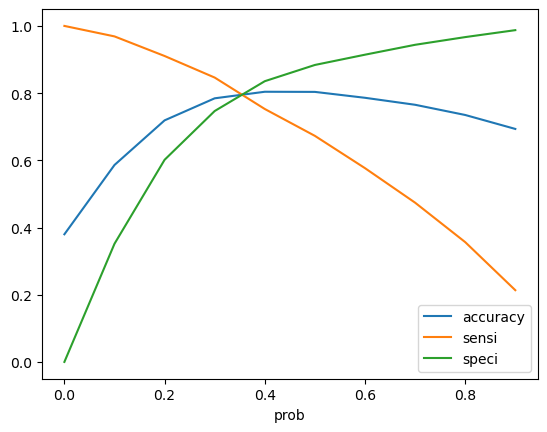

In [55]:
# Plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Analysis of the above curve
***Accuracy*** - Becomes stable after 0.35

***Sensitivity*** - Decreases with the increased probablity.

***Specificity*** - Increases with the increasing probablity.

***At point 0.35*** where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

So, 0.35 may be the optimal cutoff.

# Predicted value with 0.35 probablity cutoff

In [56]:
# Creating a column with name "predicted", which is the predicted value for 0.35 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.066114,4143,1,0,0,0,0,0,0,0,0,0,0
1,0,0.021312,8875,1,0,0,0,0,0,0,0,0,0,0
2,0,0.333193,1587,1,1,1,1,0,0,0,0,0,0,0
3,1,0.973486,6977,1,1,1,1,1,1,1,1,1,1,1
4,0,0.339611,3386,1,1,1,1,0,0,0,0,0,0,0


### Creating Lead Score
Creating a column called `Lead Score` by multplying the converted probablity with 100.

Lead Score = (Converted_Prob) X 100

In [57]:
# Creating Lead Score column
y_train_pred_final['Lead Score'] = round((y_train_pred_final['Converted_Prob']*100))
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
0,0,0.066114,4143,1,0,0,0,0,0,0,0,0,0,0,7.0
1,0,0.021312,8875,1,0,0,0,0,0,0,0,0,0,0,2.0
2,0,0.333193,1587,1,1,1,1,0,0,0,0,0,0,0,33.0
3,1,0.973486,6977,1,1,1,1,1,1,1,1,1,1,1,97.0
4,0,0.339611,3386,1,1,1,1,0,0,0,0,0,0,0,34.0


The customers with Lead Score more than 35 will be converted as we decided to have the optimal probablity cutoff is 0.35.

Higher the Lead Score, higher the chance of the customers to be converted. 

#### Finding the average Lead Score of the predicted converted leads

In [58]:
# Creating dataframe for predicted converted leads
y_train_pred_converted = y_train_pred_final[y_train_pred_final['predicted']==1]
y_train_pred_converted.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
3,1,0.973486,6977,1,1,1,1,1,1,1,1,1,1,1,97.0
5,0,0.362792,2972,1,1,1,1,0,0,0,0,0,0,1,36.0
6,1,0.808006,2564,1,1,1,1,1,1,1,1,1,0,1,81.0
8,1,0.797121,967,1,1,1,1,1,1,1,1,0,0,1,80.0
9,1,0.932565,1561,1,1,1,1,1,1,1,1,1,1,1,93.0


In [59]:
# Average Lead Score of the predicted converted leads
avg_converted = round(sum(y_train_pred_converted['Lead Score'])/len(y_train_pred_converted.index))
avg_converted

69

We can see that the average Lead Score of the customers, who were `converted` is `69`.

#### Finding the average Lead Score of the predicted not converted leads

In [60]:
# Creating dataframe for predicted not converted leads
y_train_pred_not_converted = y_train_pred_final[y_train_pred_final['predicted']==0]
y_train_pred_not_converted.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
0,0,0.066114,4143,1,0,0,0,0,0,0,0,0,0,0,7.0
1,0,0.021312,8875,1,0,0,0,0,0,0,0,0,0,0,2.0
2,0,0.333193,1587,1,1,1,1,0,0,0,0,0,0,0,33.0
4,0,0.339611,3386,1,1,1,1,0,0,0,0,0,0,0,34.0
7,0,0.052615,717,1,0,0,0,0,0,0,0,0,0,0,5.0


In [61]:
# Average Lead Score of the predicted not converted leads
avg_not_converted = round(sum(y_train_pred_not_converted['Lead Score'])/len(y_train_pred_not_converted.index))
avg_not_converted

15

We can see that the average Lead Score of the customers, who were `not converted` is `15`.

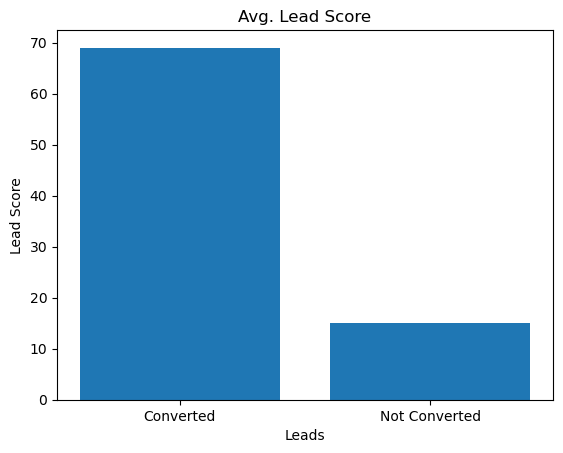

In [62]:
# Bar plot
plt.bar(['Converted', 'Not Converted'], [avg_converted, avg_not_converted])
plt.xlabel('Leads')
plt.ylabel('Lead Score')
plt.title('Avg. Lead Score')
plt.show()

# Confusion Matrix and Accuracy

##### Confusion matrix

In [63]:
# Importing metrics library
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print(confusion)

[[3562  888]
 [ 564 2162]]


In [64]:
# Predicted        not_converted  converted
# Actual
# not_converted        3562            888
# converted            564            2162  

#### Accuracy

In [65]:
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.7976588628762542

So using the confusion matrix, we got an accuracy of about 79.76% which is equivalent to 80 %, which seems to be a good number.

### Sensitivity & Specificity

In [66]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [67]:
#### Sensitivity (Number of correctly predicted YES)
# Let's see the sensitivity
TP / float(TP+FN)

0.7931034482758621

In [68]:
#### Specificity (Number of correctly predicted NOs)
# Let us calculate specificity
TN / float(TN+FP)

0.8004494382022472

In [69]:
#### False postive rate
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.1995505617977528


In [70]:
#### Positive predictive value 
# positive predictive value 
print (TP / float(TP+FP))

0.7088524590163935


In [71]:
#### Negative predictive value
# Negative predictive value
print (TN / float(TN+ FN))

0.8633058652447891


#### Analysis

So our model seems to have `Good accuracy (~79.77%)`, `Good specificity (~80.04%)` and `Good sensitivity (~79.31%)`.

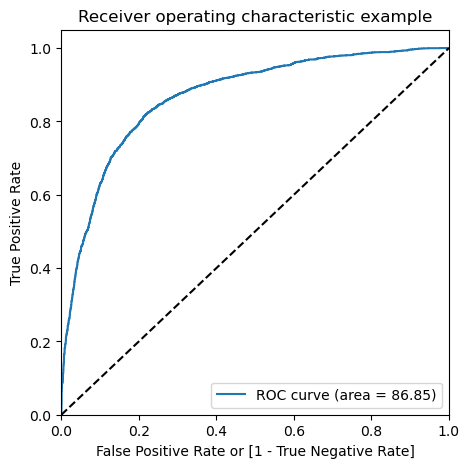

In [72]:
# ROC Curve function
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'], drop_intermediate = False )

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )*100
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

#### Gini of the model
We can see from the ROC curve, that the area of the curve is 86.85 %, which is the Gini of the model.

The curve is hugging the true positive rate axis.

## Testing the model

#### Statsmodel for the test set with the final model result4

In [73]:
# Predictions on the test set with the final model log_model_2
y_test_pred = result4.predict(X_test_sm)
y_test_pred.head()

0    0.180660
1    0.511622
2    0.498809
3    0.199709
4    0.061589
dtype: float64

In [74]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
0,0.180660
1,0.511622
2,0.498809
3,0.199709
4,0.061589


In [75]:
# Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
341,0
5449,0
6360,1
5091,0
6311,0


In [76]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

# Removing index form the both dataframes to merge them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [77]:
# Appending y_pred_1 and y_test_df
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [78]:
y_pred_final.head()

,Converted,CustID,0
0,0,341,0.180660
1,0,5449,0.511622
2,1,6360,0.498809
3,0,5091,0.199709
4,0,6311,0.061589


In [79]:
# Renaming the '0' column as Converted probablity
y_pred_final = y_pred_final.rename(columns={0:'Converted_Prob'})

y_pred_final.head()

,Converted,CustID,Converted_Prob
0,0,341,0.180660
1,0,5449,0.511622
2,1,6360,0.498809
3,0,5091,0.199709
4,0,6311,0.061589


###### In the test set using 0.35 probablity cutoff, what we got in the train set 

In [80]:
y_pred_final['test_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)

y_pred_final.head()

,Converted,CustID,Converted_Prob,test_predicted
0,0,341,0.180660,0
1,0,5449,0.511622,1
2,1,6360,0.498809,1
3,0,5091,0.199709,0
4,0,6311,0.061589,0


#### Assigning Lead Score

In [81]:
# Creating Lead Score column
y_pred_final['Lead Score'] = round((y_pred_final['Converted_Prob']*100))
y_pred_final.head()

,Converted,CustID,Converted_Prob,test_predicted,Lead Score
0,0,341,0.180660,0,18.0
1,0,5449,0.511622,1,51.0
2,1,6360,0.498809,1,50.0
3,0,5091,0.199709,0,20.0
4,0,6311,0.061589,0,6.0


The customers with Lead Score more than 35 will be converted as the probablity cutoff is 0.35.

Higher the Lead Score, higher the chance of the customers to be converted.

#### Confusion matrix

In [82]:
confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['test_predicted'])
confusion_test

array([[890, 239],
       [127, 538]], dtype=int64)

In [83]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

#### Accuracy

In [84]:
# Let's check the overall accuracy of the test set
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['test_predicted'])

0.7959866220735786

#### Sensitivity

In [85]:
# Sensitivity of the test set
TP / float(TP+FN)

0.8090225563909774

#### Sepcificity

In [86]:
# Specificity for the test set
TN / float(TN+FP)

0.7883082373782108

### Conclusion train vs test

- Train set
    - Accuracy = 79.77 %
    - Sensitivity = 79.31 %
    - Specificity = 80.04 %
- Test set
    - Accuracy = 79.60 %
    - Sensitivity = 80.90 %
    - Specificity = 78.83 %
    
Summary : The model demonstrates consistent performance across both the training and test datasets, indicating its ability to             generalize well and apply the learned patterns effectively to new data.